### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [3]:
data = pd.read_csv('data/coupons.csv')

In [4]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [151]:
#Install ydata-profiling to generate a report to explore the data.
!pip install ydata-profiling 

In [74]:
from ydata_profiling import ProfileReport

profile = ProfileReport(data)
profile.to_file(output_file='output.html')

profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [5]:
num_rows = data.shape[0]
print(f"Number of rows: {num_rows}")

Number of rows: 12684


In [7]:
#Show types
print(data.dtypes)

destination             object
passanger               object
weather                 object
temperature              int64
time                    object
coupon                  object
expiration              object
gender                  object
age                     object
maritalStatus           object
has_children             int64
education               object
occupation              object
income                  object
car                     object
Bar                     object
CoffeeHouse             object
CarryAway               object
RestaurantLessThan20    object
Restaurant20To50        object
toCoupon_GEQ5min         int64
toCoupon_GEQ15min        int64
toCoupon_GEQ25min        int64
direction_same           int64
direction_opp            int64
Y                        int64
dtype: object


/var/folders/t9/_hkshk3n1lgf0p7c36zk3c3m0000gn/T/ipykernel_84503/1312026375.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values_filtered.index, y=missing_values_filtered.values, palette='muted')


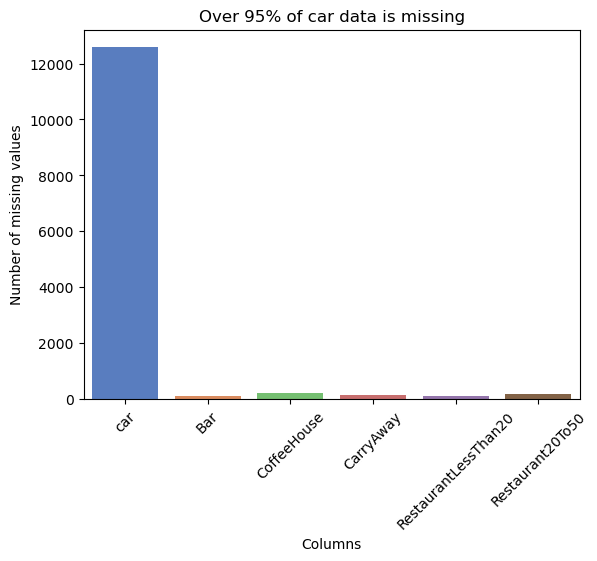

In [38]:
#Determine columns with missing values
missing_values = data.isnull().sum()
missing_values_filtered = missing_values[missing_values > 0]
missing_values_filtered

# Plot missing values:

#data.isna().sum().plot(kind = 'bar')
sns.barplot(x=missing_values_filtered.index, y=missing_values_filtered.values, palette='muted')
plt.title("Over 95% of car data is missing")
plt.xticks(rotation=45)
plt.xlabel("Columns")
plt.ylabel("Number of missing values")
plt.savefig('images/missing_values_plot.png', bbox_inches='tight')

In [17]:
# List of columns with missing values
incomplete_columns = ['car', 'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50']

for column in incomplete_columns:
    print(data[column].value_counts())

car
Scooter and motorcycle                      22
Mazda5                                      22
do not drive                                22
crossover                                   21
Car that is too old to install Onstar :D    21
Name: count, dtype: int64
Bar
never    5197
less1    3482
1~3      2473
4~8      1076
gt8       349
Name: count, dtype: int64
CoffeeHouse
less1    3385
1~3      3225
never    2962
4~8      1784
gt8      1111
Name: count, dtype: int64
CarryAway
1~3      4672
4~8      4258
less1    1856
gt8      1594
never     153
Name: count, dtype: int64
RestaurantLessThan20
1~3      5376
4~8      3580
less1    2093
gt8      1285
never     220
Name: count, dtype: int64
Restaurant20To50
less1    6077
1~3      3290
never    2136
4~8       728
gt8       264
Name: count, dtype: int64


3. Decide what to do about your missing data -- drop, replace, other...

In [18]:
filtered_data = None

filtered_data = data.copy()
mode_values = {}
# Given only a small portion of the columns have missing data, replace null data with the mode for each column

# Determine mode for each column
for column in incomplete_columns:
    mode = data[column].mode().iloc[0]
    mode_values[column] = mode
    print(f"Mode for {column}: {mode}")


# Replace the missing data with the mode of the dataset
for column, mode in mode_values.items():
    filtered_data[column] = filtered_data[column].fillna(mode)

# Drop the car column, as there are many null values and the data doesnt seem particularily useful:
filtered_data = filtered_data.drop(columns='car')
filtered_data.head()


Mode for car: Mazda5
Mode for Bar: never
Mode for CoffeeHouse: less1
Mode for CarryAway: 1~3
Mode for RestaurantLessThan20: 1~3
Mode for Restaurant20To50: less1


,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0


4. What proportion of the total observations chose to accept the coupon?



Total surveys: 12684
Number of accepted coupons: 7210
Acceptance rate: 56.84326710816777%


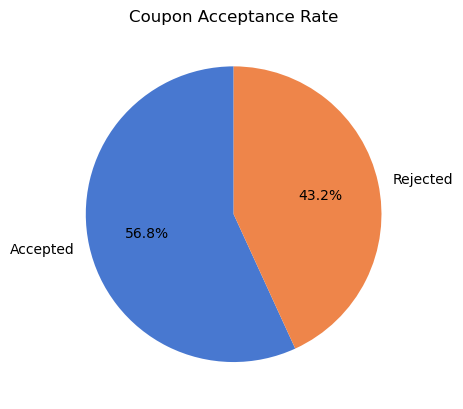

In [70]:
total_surveys = len(filtered_data)
accepted_coupons = filtered_data['Y'].sum()
rejected_coupons = total_surveys - accepted_coupons
acceptance_rate = accepted_coupons / total_surveys

print(f"Total surveys: {total_surveys}")
print(f"Number of accepted coupons: {accepted_coupons}")
print(f"Acceptance rate: {acceptance_rate * 100}%")

plt.pie([accepted_coupons, rejected_coupons],
        labels=['Accepted', 'Rejected'],
        # Show percentage
        autopct='%1.1f%%',
        startangle=90,
        colors = sns.color_palette("muted"))
plt.title('Coupon Acceptance Rate')
plt.savefig('images/coupon_acceptance.png', bbox_inches='tight')

5. Use a bar plot to visualize the `coupon` column.

/var/folders/t9/_hkshk3n1lgf0p7c36zk3c3m0000gn/T/ipykernel_84503/1355879119.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coupon_counts.index, y=coupon_counts.values, palette='muted')


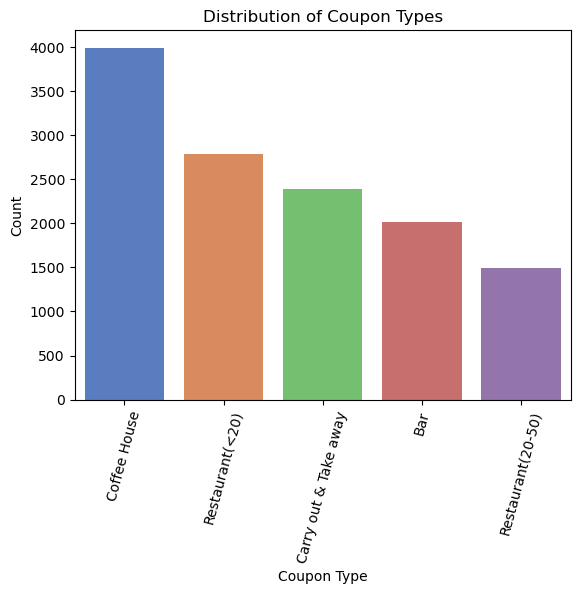

In [36]:
coupon_counts = filtered_data['coupon'].value_counts()
sns.barplot(x=coupon_counts.index, y=coupon_counts.values, palette='muted')
plt.title('Distribution of Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Count')
plt.xticks(rotation=75)
plt.savefig('images/coupon_distribution.png', bbox_inches='tight')


6. Use a histogram to visualize the temperature column.

count    12684.000000
mean        63.301798
std         19.154486
min         30.000000
25%         55.000000
50%         80.000000
75%         80.000000
max         80.000000
Name: temperature, dtype: float64


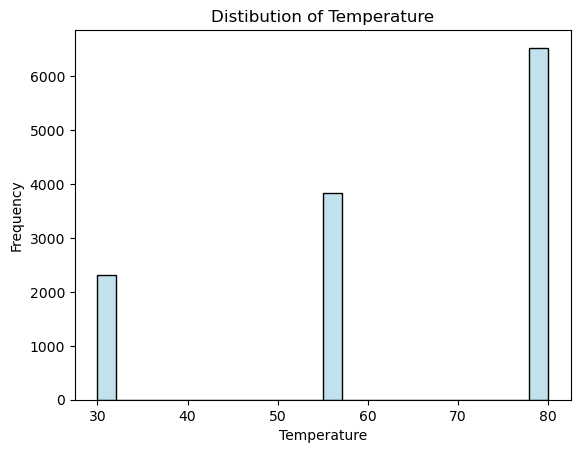

In [64]:
sns.histplot(data=filtered_data, x='temperature', color='lightblue')
plt.title('Distibution of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.savefig('images/temperature_histogram.png', bbox_inches='tight')


print(filtered_data['temperature'].describe())



**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [71]:
bar_coupons_data = filtered_data[filtered_data['coupon'] == 'Bar']
bar_coupons_data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
9,No Urgent Place,Kid(s),Sunny,80,10AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,0
13,Home,Alone,Sunny,55,6PM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,0,0,1,0,1
17,Work,Alone,Sunny,55,7AM,Bar,1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,1,0,1,0
24,No Urgent Place,Friend(s),Sunny,80,10AM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,0,1,1
35,Home,Alone,Sunny,55,6PM,Bar,1d,Male,21,Single,...,less1,4~8,4~8,less1,1,0,0,1,0,1


2. What proportion of bar coupons were accepted?


In [72]:
total_bar_surveys = len(bar_coupons_data)
accepted_bar_coupons = bar_coupons_data['Y'].sum()
rejected_bar_coupons = total_bar_surveys - accepted_bar_coupons
bar_acceptance_rate = accepted_bar_coupons / total_bar_surveys

print(f"Total surveys: {total_bar_surveys}")
print(f"Number of accepted coupons: {accepted_bar_coupons}")
print(f"Acceptance rate: {bar_acceptance_rate * 100}%")

Total surveys: 2017
Number of accepted coupons: 827
Acceptance rate: 41.00148735746158%


Total surveys: 2017
Number of accepted coupons: 827
Acceptance rate: 41.00148735746158%

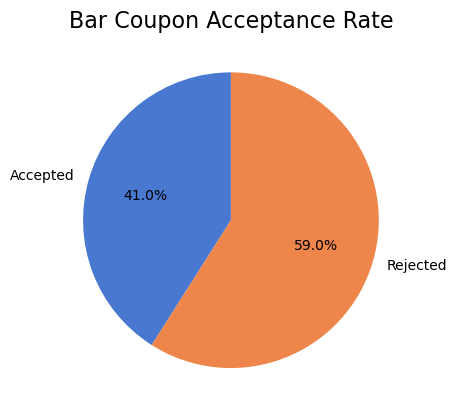

In [95]:
plt.pie([accepted_bar_coupons, total_bar_surveys - accepted_bar_coupons], 
        labels=['Accepted', 'Rejected'], 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=sns.color_palette("muted"))
plt.title('Bar Coupon Acceptance Rate', fontsize=16)
plt.savefig('images/bar_coupon_acceptance_rate.png', bbox_inches='tight')

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [85]:
# Create new dataframes based on bar query.

less_than_3 = bar_coupons_data.query("Bar in ['never', 'less1', '1~3']")
more_than_3 = bar_coupons_data.query("Bar in ['4~8', 'gt8']")

# Calculate acceptance rates
less_than_3_rate = less_than_3['Y'].mean()
more_than_3_rate = more_than_3['Y'].mean()

print(f"Acceptance rate for those who went to a bar 3 or fewer times a month: {less_than_3_rate:.2%}")
print(f"Acceptance rate for those who went to a bar more than 3 times a month: {more_than_3_rate:.2%}")


Acceptance rate for those who went to a bar 3 or fewer times a month: 37.07%
Acceptance rate for those who went to a bar more than 3 times a month: 76.88%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?

In [86]:
# Since age is not an int, define a function to determine when age is over 25:
def is_over_25(age):
    return age in ['26', '31', '36', '41', '46', '50plus']

# Create the two groups
group1 = bar_coupons_data.query("Bar in ['1~3', '4~8', 'gt8']").query("age.apply(@is_over_25)")
group2 = bar_coupons_data.query("Bar in ['never', 'less1'] or not age.apply(@is_over_25)")


# Calculate acceptance rates
group1_rate = group1['Y'].mean()
group2_rate = group2['Y'].mean()

# Print results
print(f"Drivers who go to a bar more than once a month and are over 25: {group1_rate:.2%}")
print(f"All others: {group2_rate:.2%}")

rate_difference = group1_rate - group2_rate
print(f"\nDifference in acceptance rates: {rate_difference:.2%}")

Drivers who go to a bar more than once a month and are over 25: 69.52%
All others: 33.50%

Difference in acceptance rates: 36.02%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [97]:
# Define a function for more than once a month bar goers, without kid passengers or alone,
#  and occupations and other than 'Farming Fishing & Forestry'
def group1_condition(row):
    freq_bar_goer = row['Bar'] in ['1~3', '4~8', 'gt8']
    no_kids_passenger = row['passanger'] not in ['Kid(s)', 'Alone']
    non_farm_occupation = row['occupation'] not in ['Farming Fishing & Forestry']
    return freq_bar_goer and no_kids_passenger and non_farm_occupation

group1 = bar_coupons_data[bar_coupons_data.apply(group1_condition, axis=1)]
group2 = bar_coupons_data[~bar_coupons_data.apply(group1_condition, axis=1)]

# Calculate acceptance rates
group1_rate = group1['Y'].mean()
group2_rate = group2['Y'].mean()

# Print results
print(f"Acceptance rates for go to bars >1/month, Had non-kid passengers, Not in farming/fishing/forestry: {group1_rate:.2%}")
print(f"All others: {group2_rate:.2%}")

rate_difference = group1_rate - group2_rate
print(f"Difference in acceptance rates: {rate_difference:.2%}")


Acceptance rates for go to bars >1/month, Had non-kid passengers, Not in farming/fishing/forestry: 71.79%
All others: 37.71%
Difference in acceptance rates: 34.09%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



71.7948717948718
72.17391304347827
45.348837209302324


/var/folders/t9/_hkshk3n1lgf0p7c36zk3c3m0000gn/T/ipykernel_84503/2967517744.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  plot = sns.barplot(x='Group', y='Acceptance Rate', data=plot_data, palette='muted')


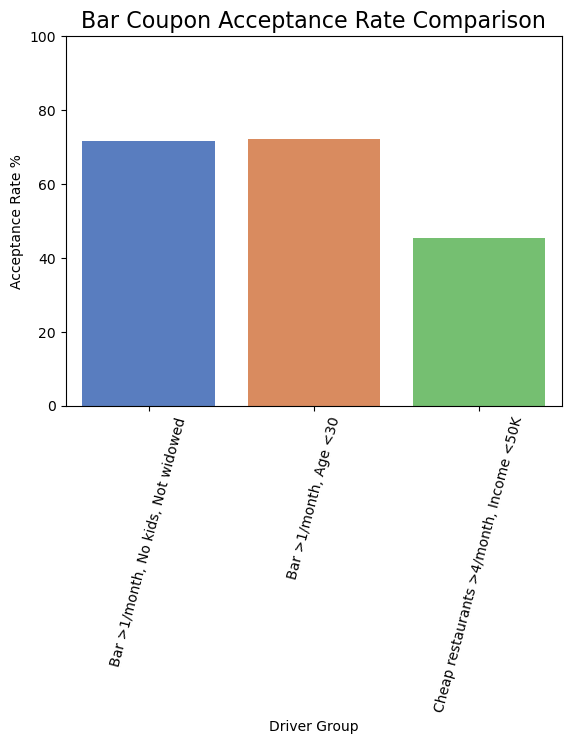

In [113]:
#Define functions for each group 
def group1_condition(row):
    return (row['Bar'] in ['1~3', '4~8', 'gt8']) and (row['passanger'] not in ['Kid(s)', 'Alone']) and (row['maritalStatus'] != 'Widowed')

def group2_condition(row):
    return (row['Bar'] in ['1~3', '4~8', 'gt8']) and (row['age'] in ['below21', '21', '26'])

def group3_condition(row):
    return (row['RestaurantLessThan20'] in ['4~8', 'gt8']) and (row['income'] in ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999'])

# Create DataFrames for each group
group1 = bar_coupons_data[bar_coupons_data.apply(group1_condition, axis=1)]
group2 = bar_coupons_data[bar_coupons_data.apply(group2_condition, axis=1)]
group3 = bar_coupons_data[bar_coupons_data.apply(group3_condition, axis=1)]

# Calculate acceptance rates
group1_rate = group1['Y'].mean() * 100
group2_rate = group2['Y'].mean() * 100 
group3_rate = group3['Y'].mean() * 100

print(group1_rate)
print(group2_rate)
print(group3_rate)
# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Group': ['Bar >1/month, No kids, Not widowed', 'Bar >1/month, Age <30', 'Cheap restaurants >4/month, Income <50K'],
    'Acceptance Rate': [group1_rate, group2_rate, group3_rate],
    'Count': [len(group1), len(group2), len(group3)]
})

plot = sns.barplot(x='Group', y='Acceptance Rate', data=plot_data, palette='muted')
plt.title('Bar Coupon Acceptance Rate Comparison', fontsize=16)
plt.xlabel('Driver Group')
plt.ylabel('Acceptance Rate %')
plt.ylim(0, 100)
plt.xticks(rotation=75)

plt.savefig('images/bar_coupon_acceptance_rate_comparison.png', bbox_inches='tight')

7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

People who frequently attend bars are more likely to accept bar coupons. Those with a lower income <50k and who frequent cheap restaurants do not correlate with a high acceptance for bar coupons.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [149]:
# Filter out coupon data for more expensive restaurants:
restaurant_coupons_data = filtered_data[filtered_data['coupon'] == 'Restaurant(20-50)']

restaurant_coupons_data

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
14,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
18,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Female,21,Unmarried partner,...,never,1~3,4~8,1~3,1,1,0,0,1,1
36,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
40,Work,Alone,Sunny,80,7AM,Restaurant(20-50),1d,Male,21,Single,...,less1,4~8,4~8,less1,1,1,0,0,1,0
58,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Male,46,Single,...,4~8,1~3,1~3,never,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12657,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12661,Work,Alone,Sunny,80,7AM,Restaurant(20-50),2h,Male,31,Married partner,...,never,4~8,gt8,less1,1,0,0,1,0,0
12669,No Urgent Place,Partner,Sunny,30,10AM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,0,1,1
12676,Home,Alone,Sunny,80,6PM,Restaurant(20-50),1d,Male,26,Single,...,never,1~3,4~8,1~3,1,0,0,1,0,1


In [136]:
# Calculate overall acceptance rate
overall_rate = restaurant_coupons_data['Y'].mean()
print(f"Overall Restaurant(20-50) coupon acceptance rate: {overall_rate:.2%}")

Overall Restaurant(20-50) coupon acceptance rate: 44.10%


Comparing the acceptance rate between those who went to a more expensive restaurant 3 or fewer times a month to those who went more:

Acceptance rate for those who went to a expensive restaurant 3 or fewer times a month: 42.29%
Acceptance rate for those who went to a expensive restaurant more than 3 times a month: 64.23%


/var/folders/t9/_hkshk3n1lgf0p7c36zk3c3m0000gn/T/ipykernel_84503/3572972374.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  restaurant_plot = sns.barplot(x='Frequency', y='Acceptance Rate', data=plot_data, palette='muted')


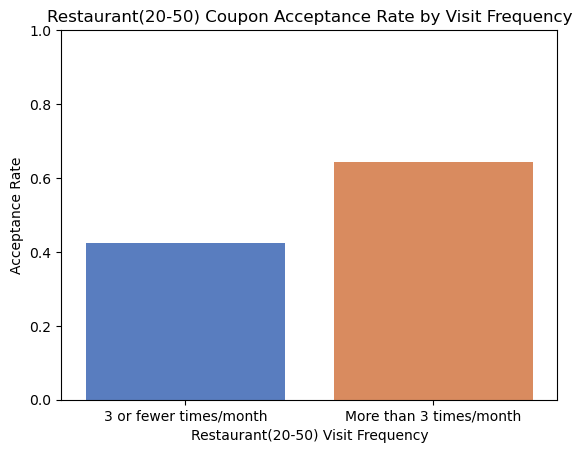

In [137]:
# Create new dataframes based on restaurant query.

less_than_3 = restaurant_coupons_data.query("Restaurant20To50 in ['never', 'less1', '1~3']")
more_than_3 = restaurant_coupons_data.query("Restaurant20To50 in ['4~8', 'gt8']")

# Calculate acceptance rates
less_than_3_rate = less_than_3['Y'].mean()
more_than_3_rate = more_than_3['Y'].mean()

print(f"Acceptance rate for those who went to a expensive restaurant 3 or fewer times a month: {less_than_3_rate:.2%}")
print(f"Acceptance rate for those who went to a expensive restaurant more than 3 times a month: {more_than_3_rate:.2%}")


plot_data = pd.DataFrame({
    'Frequency': ['3 or fewer times/month', 'More than 3 times/month'],
    'Acceptance Rate': [less_than_3_rate, more_than_3_rate],
    'Count': [len(less_than_3), len(more_than_3)]
})


restaurant_plot = sns.barplot(x='Frequency', y='Acceptance Rate', data=plot_data, palette='muted')

plt.title('Restaurant(20-50) Coupon Acceptance Rate by Visit Frequency')
plt.xlabel('Restaurant(20-50) Visit Frequency')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)

plt.savefig('images/restaurant20to50_acceptance_by_frequency.png', bbox_inches='tight')


Next lets explore how income affects acceptance rate.

/var/folders/t9/_hkshk3n1lgf0p7c36zk3c3m0000gn/T/ipykernel_84503/3655040412.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  income_plot = sns.barplot(x='Income', y='Acceptance Rate', data=acceptance_by_income, palette='muted')


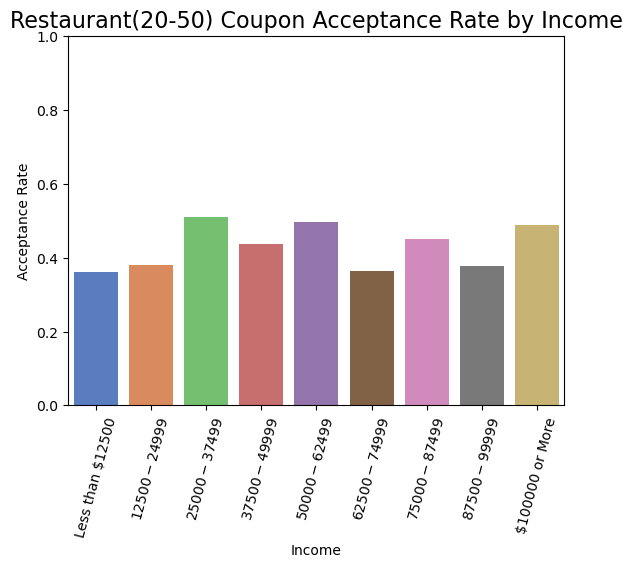

In [138]:
# Group by income and calculate acceptance rate
acceptance_by_income = restaurant_coupons_data.groupby('income')['Y'].agg(['mean', 'count'])
acceptance_by_income = acceptance_by_income.reset_index()
acceptance_by_income.columns = ['Income', 'Acceptance Rate', 'Count']
# Sort the income
income_order = ['Less than $12500', '$12500 - $24999', '$25000 - $37499', '$37500 - $49999',
                '$50000 - $62499', '$62500 - $74999', '$75000 - $87499', '$87500 - $99999',
                '$100000 or More']
acceptance_by_income['Income'] = pd.Categorical(acceptance_by_income['Income'], categories=income_order, ordered=True)
acceptance_by_income = acceptance_by_income.sort_values('Income')

income_plot = sns.barplot(x='Income', y='Acceptance Rate', data=acceptance_by_income, palette='muted')
plt.title('Restaurant(20-50) Coupon Acceptance Rate by Income', fontsize=16)
plt.xlabel('Income')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.xticks(rotation=75)
plt.savefig('images/restaurant20to50_acceptance_by_income.png', bbox_inches='tight')


Next we'll look at how age affects acceptance rate

In [140]:

restaurant_coupons_data.to_csv('data/restaurant20to50.csv', index=False)

/var/folders/t9/_hkshk3n1lgf0p7c36zk3c3m0000gn/T/ipykernel_84503/1456614579.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  age_plot = sns.barplot(x='Age', y='Acceptance Rate', data=acceptance_by_age, palette='muted')


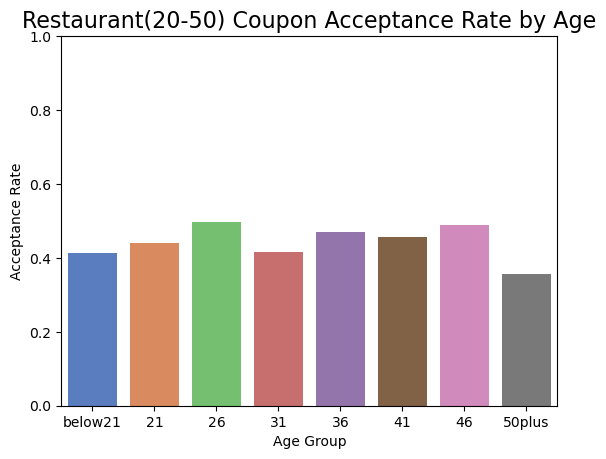

In [139]:
# Group by age and calculate acceptance rate
acceptance_by_age = restaurant_coupons_data.groupby('age')['Y'].agg(['mean', 'count'])
acceptance_by_age = acceptance_by_age.reset_index()
acceptance_by_age.columns = ['Age', 'Acceptance Rate', 'Count']

# Sort the ages
age_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']

acceptance_by_age['Age'] = pd.Categorical(acceptance_by_age['Age'], categories=age_order, ordered=True)
acceptance_by_age = acceptance_by_age.sort_values('Age')

age_plot = sns.barplot(x='Age', y='Acceptance Rate', data=acceptance_by_age, palette='muted')

plt.title('Restaurant(20-50) Coupon Acceptance Rate by Age', fontsize=16)
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate')
plt.ylim(0, 1)
plt.savefig('images/restaurant20to50_acceptance_by_age.png', bbox_inches='tight')


Lastly lets look at how education affects acceptance rates

/var/folders/t9/_hkshk3n1lgf0p7c36zk3c3m0000gn/T/ipykernel_84503/572763013.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=acceptance_by_education.index, y='Acceptance Rate', data=acceptance_by_education, palette='muted')


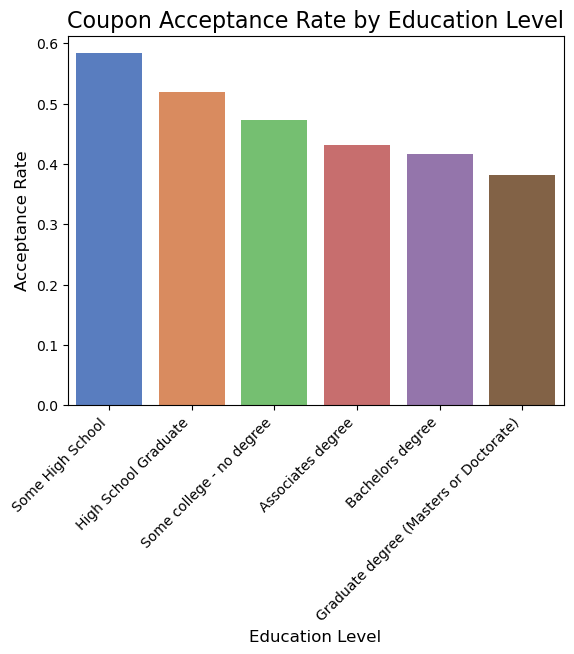

In [150]:
# Group by age and calculate acceptance rate
acceptance_by_education = restaurant_coupons_data.groupby('education')['Y'].agg(['mean', 'count'])
acceptance_by_education.columns = ['Acceptance Rate', 'Count']
acceptance_by_education = acceptance_by_education.sort_values('Acceptance Rate', ascending=False)



sns.barplot(x=acceptance_by_education.index, y='Acceptance Rate', data=acceptance_by_education, palette='muted')
plt.title('Coupon Acceptance Rate by Education Level', fontsize=16)
plt.xlabel('Education Level', fontsize=12)
plt.ylabel('Acceptance Rate', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.savefig('images/restaurant20to50_education_acceptance_rate.png', bbox_inches='tight')


